In [1]:
import pandas as pd
import numpy as np
import os, re

In [2]:
dir_path = '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/networks'

In [3]:
gene_map_path = '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/meta/hgnc_ensembl_lister.tsv'

In [4]:
gene_map = pd.read_csv(gene_map_path, index_col=1, header=None, sep='\t')
gene_map.index = [gene.upper() for gene in gene_map.index]
gene_map.iloc[:, 0] = [gene.upper() for gene in gene_map.iloc[:, 0]]
gene_map.index = [re.sub('_', '-', gene) for gene in gene_map.index]

In [5]:
gene_map

,0
RP11-34P13.7,ENSG00000238009
AL627309.1,ENSG00000237683
RP11-34P13.14,ENSG00000239906
AP006222.2,ENSG00000228463
RP4-669L17.10,ENSG00000237094
...,...
AL590523.1,ENSG00000268276
PNRC2-1,ENSG00000215700
SRSF10-1,ENSG00000215699
AC145205.1,ENSG00000215635


In [6]:
networks = [os.path.join(dir_path, f) for f in os.listdir(dir_path)]
comet_networks = [f for f in networks if 'comet' in f]
irf_loop_networks = [f for f in networks if 'edgelist' in f]

In [7]:
comet_networks

['/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/networks/comet_20m_double.tsv',
 '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/networks/comet_10m_double.tsv',
 '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/networks/comet_2m_double.tsv',
 '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/networks/already_run']

In [8]:
for path in comet_networks:
#for path in irf_loop_networks:
    out_path = path[:-4] + '_ensembl.tsv'
    network = pd.read_csv(path, sep='\t', header=None, index_col=None)
    #network = pd.read_csv(path, sep='\t', header=0, index_col=None)
    network.iloc[:, 0] = [gene.upper() for gene in network.iloc[:, 0]]
    network.iloc[:, 1] = [gene.upper() for gene in network.iloc[:, 1]]
    ens0 = np.empty(network.shape[0], dtype=object)
    ens1 = np.empty(network.shape[0], dtype=object)
    for i, gene in enumerate(network.iloc[:, 0]):
        if i % 1000000 == 0: print(i)
        ens0[i] = gene_map.loc[gene, :].values[0]
    for i, gene in enumerate(network.iloc[:, 1]):
        if i % 1000000 == 0: print(i)
        ens1[i] = gene_map.loc[gene, :].values[0]
    network.iloc[:, 0] = ens0
    network.iloc[:, 1] = ens1
    network.to_csv(out_path, sep='\t', index=None, header=None)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
0
1000000
2000000
3000000
4000000
5000000
0
1000000
2000000
3000000
4000000
5000000
0
1000000
0
1000000


IsADirectoryError: [Errno 21] Is a directory: '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/networks/already_run'

# Heatmap

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib

In [48]:
aurocs_path = '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/summary_auroc_doubles.tsv'

In [58]:
aurocs = pd.read_csv(aurocs_path, sep='\t', header=0, index_col=0)
colmap = { '0.01_ensembl_multiplex': 'comet_0.01',
       'ensembl_top_0.05_r2thresholded0.0_multiplex': 'irf-loop_0.05',
       '0.025_ensembl_multiplex': 'comet_0.025',
       'ensembl_top_0.1_r2thresholded0.0_multiplex': 'irf-loop_0.1',
       '0.1_ensembl_multiplex': 'comet_0.1',
       '0.05_ensembl_multiplex': 'comet_0.05',
       'ensembl_top_0.01_r2thresholded0.0_multiplex': 'irf-loop_0.01',
       'ensembl_top_0.025_r2thresholded0.0_multiplex': 'irf-loop_0.025',
       'NA_10m-double_multiplex': '10m-double',
       '2m-double_multiplex': '2m-double'}
aurocs = aurocs.rename(columns=colmap)
aurocs = aurocs.T
aurocs

,Astrocyte_GO,MidbrainDopamine_GO,Cholinergic_GO,CerebellumDev_GO,Alzheimers_OMIM,BloodBrainBarrier_GO,Schizophrenia_OMIM,Microglial_GO,CNS_Myelination_GO,AxonGuidance_GO,Hypothalamus_GO,Hippocampal_GO,Glutamatergic_GO,Serotonergic_GO,Neuropeptides_GO,Neurotransmitter_GO,MDD_DisGENET,DendriteExtension_GO
comet_0.01,0.188588,0.138821,0.019016,0.078176,0.187040,0.045487,0.129359,0.236751,0.083964,0.069366,0.112772,0.080542,0.061130,NaN,NaN,NaN,NaN,NaN
irf-loop_0.05,0.546314,0.318036,0.380576,0.473685,0.495306,0.599392,0.593117,0.529799,0.621542,0.502864,0.312412,0.483768,0.608059,0.190997,0.339314,0.525355,0.373796,0.631187
comet_0.025,0.219975,0.168680,0.016584,0.109241,0.197118,0.069375,0.177307,0.255921,0.102096,0.080922,0.139503,0.092455,0.083700,NaN,NaN,0.038096,NaN,0.035219
irf-loop_0.1,0.537568,0.317524,0.348378,0.460780,0.511000,0.630701,0.562944,0.511570,0.707154,0.512962,0.316128,0.501046,0.623014,0.186809,0.315300,0.501018,0.374314,0.630618
comet_0.1,0.279689,0.235012,0.008555,0.157694,0.275561,0.094207,0.184539,0.296768,0.090244,0.109312,0.172761,0.153905,0.133967,NaN,NaN,0.046684,0.063879,0.211986
10m-double,0.329607,0.279586,0.134150,0.253075,0.488663,0.265219,0.279459,0.357212,0.179868,0.194563,0.201506,0.258335,0.267222,0.043493,0.106339,0.095584,0.172279,0.219931
comet_0.05,0.274567,0.253367,0.013085,0.135799,0.220484,0.102273,0.187578,0.266839,0.107080,0.094046,0.135282,0.119210,0.114401,NaN,NaN,0.042005,NaN,0.089337
2m-double,0.334930,0.312384,0.142030,0.280554,0.335932,0.239230,0.207517,0.329961,0.176264,0.208876,0.211583,0.292156,0.286659,0.058114,0.160083,0.142985,0.270999,0.224199
irf-loop_0.01,0.524301,0.388727,0.327971,0.496805,0.459255,0.599248,0.543655,0.463815,0.654326,0.431080,0.249266,0.504293,0.608084,0.154323,0.337547,0.484470,0.350723,0.546989
irf-loop_0.025,0.569440,0.338751,0.404278,0.483678,0.450409,0.596861,0.624914,0.490124,0.633150,0.480459,0.269531,0.497710,0.621718,0.180635,0.335118,0.550884,0.328301,0.588894


In [59]:
rownames = aurocs.index.values
colnames = aurocs.columns.values
row_idx = np.argsort(rownames)
rownames = rownames[row_idx]
data = aurocs.values
data = data[row_idx, :]

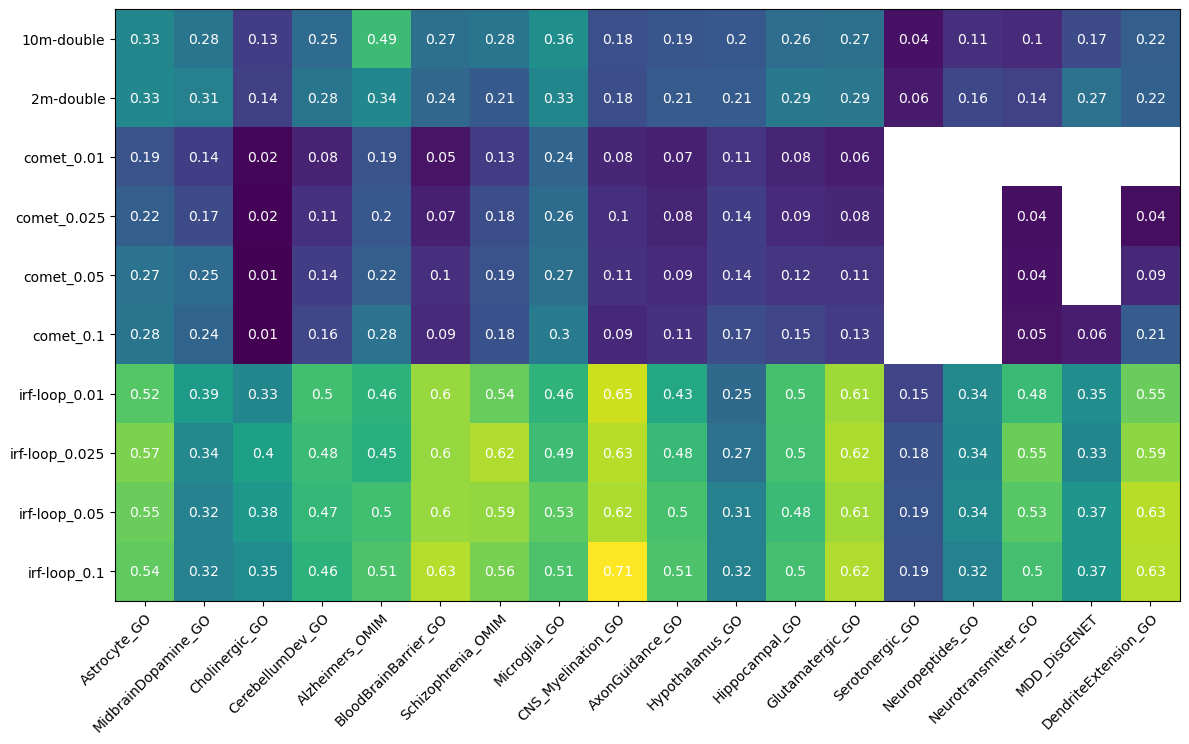

In [60]:
out_path = '/gpfs/alpine2/syb112/proj-shared/Projects/scrna-seq/data/human/brain/healthy/lister_lab/comet_out/pfc_glial-non-neuron_micro/networks/summary_auroc_doubles.png'
fig, ax = plt.subplots(figsize=(12, 8))
#im = ax.imshow(aurocs.T.values)
im = ax.imshow(data)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(colnames)), labels=colnames)
ax.set_yticks(np.arange(len(rownames)), labels=rownames)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(rownames)):
    for j in range(len(colnames)):
        text = ax.text(j, i, round(data[i, j], 2),
                       ha="center", va="center", color="w")

fig.tight_layout()
plt.savefig(out_path, dpi=300)
plt.show()